## Multiple Linear Regressionwith statsmodels

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import datasets, model_selection

We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's split the data in a test and training set.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## Fitting models - the standard way¶
Fit our model with ordinary least squares (OLS).

In [4]:
model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     89.91
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.71e-101
Time:                        16:58:20   Log-Likelihood:                -1004.1
No. Observations:                 354   AIC:                             2036.
Df Residuals:                     340   BIC:                             2090.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2923      5.406      6.159      0.0

Let's check the p-values for our coefficients

In [5]:
res.pvalues

const      2.068238e-09
CRIM       4.390740e-02
ZN         5.412685e-03
INDUS      8.565258e-02
CHAS       2.370082e-02
NOX        1.680023e-06
RM         6.153911e-19
AGE        3.786182e-01
DIS        2.684407e-09
RAD        1.358562e-06
TAX        9.063742e-05
PTRATIO    2.852199e-10
B          1.719438e-03
LSTAT      2.297454e-21
dtype: float64

Let's check if the coefficients is significant below our alpha level 5%.

In [6]:
res.pvalues < 0.05

const       True
CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX         True
RM          True
AGE        False
DIS         True
RAD         True
TAX         True
PTRATIO     True
B           True
LSTAT       True
dtype: bool

## Fitting models using R-style formulas¶
We can also fit a model with the R syntax `y ~ x_1 + x_2` and build some complexer models.

In [7]:
dat = X_train.copy()
dat['MEDV'] = y_train
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29,19.9
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20,23.8


In [8]:
results = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + PTRATIO + B', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     75.68
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.42e-80
Time:                        16:58:20   Log-Likelihood:                -1061.6
No. Observations:                 354   AIC:                             2145.
Df Residuals:                     343   BIC:                             2188.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5185      6.077      2.718      0.0

Let's plot the QQ-Plot for the residuals

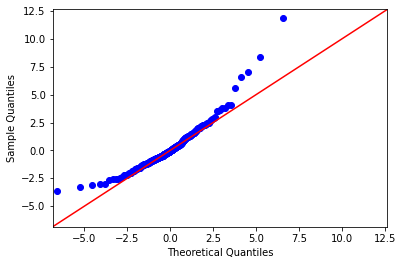

In [9]:
fig = sm.qqplot(results.resid, stats.t, fit=True, line="45")
plt.show()

In [10]:
results = smf.ols('MEDV ~ CRIM + ZN', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           6.99e-21
Time:                        16:58:20   Log-Likelihood:                -1221.0
No. Observations:                 354   AIC:                             2448.
Df Residuals:                     351   BIC:                             2460.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4970      0.500     45.008      0.0

Let's plot the QQ-Plot for the residuals

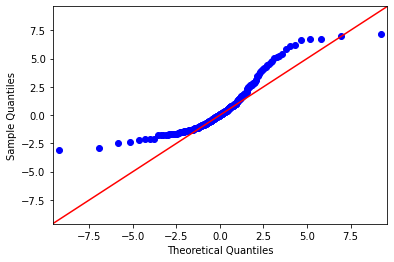

In [11]:
fig = sm.qqplot(results.resid, stats.t, fit=True, line="45")
plt.show()